In [ ]:
! python -m nltk.downloader all
! pip install imbalanced-learn

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipp

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import time
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold  # Used to create a KFold object
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input, Flatten, BatchNormalization
from tensorflow.keras import initializers

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP_Chatbot_Capstone_Project/data.csv')

In [ ]:
del df['Unnamed: 0'] 
df

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [ ]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
Description,0,0.0
Critical Risk,0,0.0
Employee or Third Party,0,0.0
Genre,0,0.0
Potential Accident Level,0,0.0
Accident Level,0,0.0
Industry Sector,0,0.0
Local,0,0.0
Countries,0,0.0
Data,0,0.0


In [ ]:
dataframe=df.copy()
y=dataframe['Accident Level'].values
del dataframe['Accident Level']

In [ ]:
y

array(['I', 'I', 'I', 'I', 'IV', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'IV', 'I', 'I', 'III', 'I', 'I', 'I', 'I', 'I', 'II', 'II', 'I',
       'I', 'I', 'I', 'I', 'II', 'I', 'I', 'III', 'V', 'I', 'I', 'I', 'I',
       'I', 'I', 'II', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'III', 'I',
       'III', 'I', 'I', 'III', 'II', 'I', 'I', 'I', 'I', 'II', 'IV', 'I',
       'I', 'I', 'I', 'I', 'IV', 'I', 'II', 'I', 'I', 'I', 'I', 'III',
       'I', 'I', 'I', 'II', 'IV', 'I', 'I', 'III', 'I', 'I', 'I', 'I',
       'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'II',
       'I', 'I', 'III', 'I', 'I', 'IV', 'I', 'I', 'I', 'II', 'I', 'I',
       'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'IV', 'I', 'II', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'V', 'II', 'I',
       'I', 'I', 'I', 'I', 'IV', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
       'I', 'I', 'I', 'IV', 'IV', 'I', 'I', 'I', 'I', 'I', 'I', 'V',
       'III', 'I', 'I', 'IV', 'I', 'III', 'III', 'IV', '

In [ ]:
categorical_columns=dataframe.columns

# **# Encoding**

> Encoding Dataset for Model Preparation.



In [ ]:
column_names_encoded=list(df.columns)
column_names_encoded.remove('Critical Risk')
column_names_encoded.remove('Description')
column_names_encoded.remove('Data')
column_names_encoded.remove('Accident Level')

In [ ]:
# Performing label encoding of column accident level
import numpy as np
from sklearn.preprocessing import LabelEncoder   
  
def one_hot_encoding_columns(column_name,dataframe):
  accident_level=  dataframe[column_name].to_numpy()
  labelencoder = LabelEncoder()  
  accident_level_encoded = labelencoder.fit_transform(accident_level)
  enc = OneHotEncoder(handle_unknown='ignore')
  X = (np.array(accident_level_encoded).reshape(-1,1))
  drop_enc = enc.fit_transform(X)
  # print(drop_enc.todense())
  dataframe = pd.concat([dataframe,pd.DataFrame(drop_enc.todense(),columns = [column_name+'_'+j for j in labelencoder.inverse_transform(enc.categories_[0])])],axis = 1)
  del dataframe[column_name]
  return dataframe

encoded_dataframe=one_hot_encoding_columns(column_names_encoded[0],df)
for i in range(1,len(column_names_encoded)):
  encoded_dataframe=one_hot_encoding_columns(column_names_encoded[i],encoded_dataframe)

In [ ]:
encoded_dataframe

,Data,Accident Level,Critical Risk,Description,Countries_Country_01,Countries_Country_02,Countries_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Metals,Industry Sector_Mining,Industry Sector_Others,Potential Accident Level_I,Potential Accident Level_II,Potential Accident Level_III,Potential Accident Level_IV,Potential Accident Level_V,Potential Accident Level_VI,Genre_Female,Genre_Male,Employee or Third Party_Employee,Employee or Third Party_Third Party,Employee or Third Party_Third Party (Remote)
0,2016-01-01 00:00:00,I,Pressed,While removing the drill rod of the Jumbo 08 f...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2016-01-02 00:00:00,I,Pressurized Systems,During the activation of a sodium sulphide pum...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2016-01-06 00:00:00,I,Manual Tools,In the sub-station MILPO located at level +170...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2016-01-08 00:00:00,I,Others,Being 9:45 am. approximately in the Nv. 1880 C...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2016-01-10 00:00:00,IV,Others,Approximately at 11:45 a.m. in circumstances t...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,I,Others,"Being approximately 5:00 a.m. approximately, w...",1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
421,2017-07-04 00:00:00,I,Others,The collaborator moved from the infrastructure...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
422,2017-07-05 00:00:00,I,Venomous Animals,During the environmental monitoring activity i...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
423,2017-07-06 00:00:00,I,Cut,The Employee performed the activity of strippi...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
encoded_dataframe.columns

Index(['Data', 'Accident Level', 'Critical Risk', 'Description',
       'Countries_Country_01', 'Countries_Country_02', 'Countries_Country_03',
       'Local_Local_01', 'Local_Local_02', 'Local_Local_03', 'Local_Local_04',
       'Local_Local_05', 'Local_Local_06', 'Local_Local_07', 'Local_Local_08',
       'Local_Local_09', 'Local_Local_10', 'Local_Local_11', 'Local_Local_12',
       'Industry Sector_Metals', 'Industry Sector_Mining',
       'Industry Sector_Others', 'Potential Accident Level_I',
       'Potential Accident Level_II', 'Potential Accident Level_III',
       'Potential Accident Level_IV', 'Potential Accident Level_V',
       'Potential Accident Level_VI', 'Genre_Female', 'Genre_Male',
       'Employee or Third Party_Employee',
       'Employee or Third Party_Third Party',
       'Employee or Third Party_Third Party (Remote)'],
      dtype='object')

In [ ]:
output_column=encoded_dataframe['Accident Level'].values
del encoded_dataframe['Accident Level']

In [ ]:
encoded_dataframe['Merged_Description']= encoded_dataframe['Description']+' '+encoded_dataframe['Critical Risk']

In [ ]:
encoded_dataframe['Merged_Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo. Pressed'

In [ ]:
stop_words = stopwords.words('english')
punctuations = list(string.punctuation)
stop_words += punctuations        

In [ ]:
import re
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [ ]:
words=[]
max_features=0
max_len_sentence=0
for i in range(0,len(encoded_dataframe['Merged_Description'])):
   words.append(clean_text(" ".join([w for w in word_tokenize(encoded_dataframe['Merged_Description'][i]) if not w in stop_words])))
   max_features+=len(word_tokenize(words[i]))
   max_len_sentence=max(max_len_sentence,len(word_tokenize(words[i])))

In [ ]:
encoded_dataframe['Clean Words']=words

In [ ]:
encoded_dataframe['Clean Words'][20]

'at 1416 operator samuel open container subsequent loading silver concentrate opened first gate afterwards tries open second door product opening latter first one opens impacts handle safety lens generates injury left cheekbone face operator others'

In [ ]:
max_features,max_len_sentence

(16126, 105)

In [ ]:
MAX_FEATURES = max_features
MAX_LEN = max_len_sentence+int(MAX_FEATURES/len(encoded_dataframe))
EMBEDDING_SIZE = 200

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=MAX_FEATURES,oov_token='<OOV>')
tokenizer.fit_on_texts(encoded_dataframe['Clean Words'])
tokenized_description=tokenizer.texts_to_sequences(encoded_dataframe['Clean Words'])

In [ ]:
tokenized_description[1]

[22,
 1793,
 1197,
 1198,
 49,
 1794,
 1795,
 1796,
 250,
 1797,
 15,
 524,
 628,
 116,
 61,
 107,
 525,
 1199,
 747,
 1798,
 629,
 455,
 315,
 907,
 1198,
 250,
 1799,
 1800,
 1801,
 316,
 317]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_tokenized_description = pad_sequences(maxlen=MAX_LEN, sequences=tokenized_description, padding="post", value=1)

In [ ]:
padded_tokenized_description[1]

array([  22, 1793, 1197, 1198,   49, 1794, 1795, 1796,  250, 1797,   15,
        524,  628,  116,   61,  107,  525, 1199,  747, 1798,  629,  455,
        315,  907, 1198,  250, 1799, 1800, 1801,  316,  317,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
      dtype=int32)

In [ ]:
word_number_mapping=tokenizer.word_index
number_word_mapping = dict([(value, key) for key, value in word_number_mapping.items()])

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

3481


In [ ]:
import zipfile

path_to_zip_file='/content/drive/MyDrive/glove.6B.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall()

def loadGloveModel(File):
    print("Loading Glove Model")
    f = open(File,'r')
    gloveModel = {}
    for line in f:
        splitLines = line.split()
        word = splitLines[0]
        wordEmbedding = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word] = wordEmbedding
    print(len(gloveModel)," words loaded!")
    return gloveModel

# model_50=loadGloveModel('/content/glove.6B.50d.txt')
# model_100=loadGloveModel('/content/glove.6B.100d.txt')
model_200=loadGloveModel('/content/glove.6B.200d.txt')
# model_300=loadGloveModel('/content/glove.6B.300d.txt')

Loading Glove Model
400000  words loaded!


In [ ]:
# create a weight matrix for words in training docs
# Using the 200 dimesnsional glove embeddings.....

embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
	embedding_vector = model_200.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
datetime_object=[]
for i in range(0,len(dataframe)):
  datetime_object.append(datetime.strptime((dataframe[categorical_columns[0]][i]), '%Y-%m-%d %H:%M:%S'))
unix_time=[]
for i in datetime_object:
  unix_time.append(time.mktime(i.timetuple()))

In [ ]:
del encoded_dataframe['Critical Risk']
del encoded_dataframe['Description']
del encoded_dataframe['Merged_Description']
del encoded_dataframe['Data']
del encoded_dataframe['Clean Words']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
encoded_dataframe['Time']=scaler.fit_transform(np.array(unix_time).reshape(-1,1))

In [ ]:
model=Sequential()
embedding_layer=Embedding(num_words,output_dim=EMBEDDING_SIZE, weights=[embedding_matrix], input_length=MAX_LEN,trainable=False)
model.add(embedding_layer)
model.compile('adam','mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 142, 200)          696200    
Total params: 696,200
Trainable params: 0
Non-trainable params: 696,200
_________________________________________________________________


In [ ]:
# embedding_parameters=model.predict(padded_tokenized_description)
# temp_joining=embedding_parameters.reshape(-1,MAX_LEN*EMBEDDING_SIZE)
# temp_joining=pd.concat([encoded_dataframe,pd.DataFrame(temp_joining)],axis=1)

In [ ]:
temp_joining=pd.concat([encoded_dataframe,pd.DataFrame(padded_tokenized_description)],axis=1)

In [ ]:
labelencoder_y = LabelEncoder()  
accident_level_encoded = labelencoder_y.fit_transform(output_column)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(temp_joining,accident_level_encoded)
x_train.shape,x_test.shape,y_test.shape,y_test.shape

((318, 172), (107, 172), (107,), (107,))

In [ ]:
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_sample(x_train, y_train)
# X_res.shape,y_res.shape,x_test.shape,y_test.shape

In [ ]:
# range_values=range(0,MAX_LEN*EMBEDDING_SIZE)
# x_train_description=pd.DataFrame(x_train,columns=range_values)
# x_test_description=pd.DataFrame(x_test,columns=range_values)
# x_train_others=pd.DataFrame(x_train,columns=list(set(x_train.columns)-set(range_values)))
# x_test_others=pd.DataFrame(x_test,columns=list(set(x_test.columns)-set(range_values)))

In [ ]:
range_values=range(0,MAX_LEN)
x_train_description=pd.DataFrame(x_train,columns=range_values)
x_test_description=pd.DataFrame(x_test,columns=range_values)
x_train_others=pd.DataFrame(x_train,columns=list(set(x_train.columns)-set(range_values)))
x_test_others=pd.DataFrame(x_test,columns=list(set(x_test.columns)-set(range_values)))

In [ ]:
# range_values=range(0,MAX_LEN)
# x_res_description=pd.DataFrame(pd.DataFrame(X_res,columns=x_train.columns),columns=range_values)
# x_test_description=pd.DataFrame(x_test,columns=range_values)
# x_res_others=pd.DataFrame(pd.DataFrame(X_res,columns=x_train.columns),columns=list(set(pd.DataFrame(X_res,columns=x_train.columns).columns)-set(range_values)))
# x_test_others=pd.DataFrame(x_test,columns=list(set(x_test.columns)-set(range_values)))

In [ ]:
# x_train_description=np.array(x_train_description).reshape(-1,MAX_LEN,EMBEDDING_SIZE)
# x_test_description=np.array(x_test_description).reshape(-1,MAX_LEN,EMBEDDING_SIZE)

In [ ]:
x_train_description=np.array(x_train_description).reshape(-1,MAX_LEN)
x_test_description=np.array(x_test_description).reshape(-1,MAX_LEN)

In [ ]:
# x_res_description=np.array(x_res_description).reshape(-1,MAX_LEN)

In [ ]:
print(x_train.shape,x_test.shape)
print(x_train_description.shape,x_test_description.shape)
print(x_train_others.shape,x_test_others.shape)
print(y_train.shape,y_test.shape)

(318, 172) (107, 172)
(318, 142) (107, 142)
(318, 30) (107, 30)
(318,) (107,)


In [ ]:
# print(X_res.shape,x_test.shape)
# print(x_res_description.shape,x_test_description.shape)
# print(x_res_others.shape,x_test_others.shape)
# print(y_res.shape,y_test.shape)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# def Random_Forest_Classifier(x_train,x_test,y_train,y_test):
#   rfcl = RandomForestClassifier(n_estimators = 6)
#   rfcl = rfcl.fit(x_train, y_train)
#   y_pred=rfcl.predict(x_test)
#   print(classification_report(y_test,y_pred))
#   print(confusion_matrix(y_test,y_pred))
#   print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))

In [ ]:
# Random_Forest_Classifier(x_train,x_test,y_train,y_test)

In [ ]:
# Random_Forest_Classifier(X_res,x_test,y_res,y_test)

In [ ]:
print(x_train.shape,x_test.shape)
print(x_train_description.shape,x_test_description.shape)
print(x_train_others.shape,x_test_others.shape)
print(y_train.shape,y_test.shape)

(318, 172) (107, 172)
(318, 142) (107, 142)
(318, 30) (107, 30)
(318,) (107,)


In [ ]:
# print(X_res.shape,x_test.shape)
# print(x_res_description.shape,x_test_description.shape)
# print(x_res_others.shape,x_test_others.shape)
# print(y_res.shape,y_test.shape)

In [ ]:
from tensorflow.keras import layers

In [ ]:
# Inputs to the Model............
input_layer_description=Input(shape=(MAX_LEN),name='Description')
input_layer_others=Input(shape=(x_train_others.shape[1]),name='Others')

# Embedding Layer for Description................
embedding_layer_description=Embedding(num_words,output_dim=EMBEDDING_SIZE, weights=[embedding_matrix], input_length=MAX_LEN,trainable=False)(input_layer_description)

# LSTM Layers for Description ........
lstm_layer_1_description=Bidirectional(LSTM(units=200, return_sequences=True, recurrent_dropout=0.5,kernel_initializer='he_normal'))(embedding_layer_description)

lstm_layer_2_description=Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.5,kernel_initializer='he_normal'))(lstm_layer_1_description)


# Supporting layers for LSTM.........................
time_distributed_layer_description=TimeDistributed(Dense(100, activation="tanh"))(lstm_layer_2_description)
flatten_layer_description=Flatten()(time_distributed_layer_description)
dropout_layer_1_description=Dropout(0.3)(flatten_layer_description)



# Dense Layers for Description............................
dense_layer_1_description=Dense(units=1024,activation='relu',use_bias=True)(dropout_layer_1_description)
batch_normalization_layer_1_description=BatchNormalization()(dense_layer_1_description)
dropout_layer_2_description=Dropout(0.1)(batch_normalization_layer_1_description)

dense_layer_2_description=Dense(units=512, activation = 'relu')(dropout_layer_2_description)
batch_normalization_layer_2_description=BatchNormalization()(dense_layer_2_description)
dropout_layer_3_description=Dropout(0.1)(batch_normalization_layer_2_description)

dense_layer_3_description=(Dense(units=256, activation = 'relu'))(dropout_layer_3_description)
batch_normalization_layer_3_description=BatchNormalization()(dense_layer_3_description)
dropout_layer_4_description=Dropout(0.1)(batch_normalization_layer_3_description)

model_1_out=Dense(units=128, activation = 'relu')(dropout_layer_4_description)

# Dense Layer for Others............

dense_layers_1_others = Dense(units=512, activation = 'relu')(input_layer_others)
batch_normalization_layer_1_others=BatchNormalization()(dense_layers_1_others)
dropout_layer_1_others=Dropout(0.3)(batch_normalization_layer_1_others)     

dense_layers_2_others=Dense(units=256, activation = 'relu')(dropout_layer_1_others)
batch_normalization_layer_2_others=BatchNormalization()(dense_layers_2_others)
dropout_layer_2_others=Dropout(0.3)(batch_normalization_layer_2_others)

model_2_out=Dense(units=128, activation = 'relu')(dropout_layer_2_others)


# Concatenating Layers..........
concatt = layers.concatenate([model_1_out,model_2_out])


# Final Layers................

Final_Dense_layer_1=(Dense(units=64, activation = 'relu'))(concatt)
Final_Batch_normalization_layer_1=BatchNormalization()(Final_Dense_layer_1)
Final_Batch_dropout_layer_1=Dropout(0.3) (Final_Batch_normalization_layer_1)

Final_Dense_layer_2=(Dense(units=32, activation = 'relu'))(Final_Batch_dropout_layer_1)
Final_Batch_normalization_layer_2=BatchNormalization()(Final_Dense_layer_2)

Final_Dense_layer_3=(Dense(units=16, activation = 'relu'))(Final_Batch_normalization_layer_2)
Final_Batch_normalization_layer_3=BatchNormalization()(Final_Dense_layer_3)

Final_Model_out_layer=(Dense(units=5, activation = 'softmax'))(Final_Batch_normalization_layer_3)

# Compiling Model.........................

Final_Model=Model(inputs=[input_layer_description,input_layer_others],outputs=[Final_Model_out_layer])

In [ ]:
Final_Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Description (InputLayer)        [(None, 142)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 142, 200)     696200      Description[0][0]                
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 142, 400)     641600      embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 142, 200)     400800      bidirectional[0][0]              
______________________________________________________________________________________________

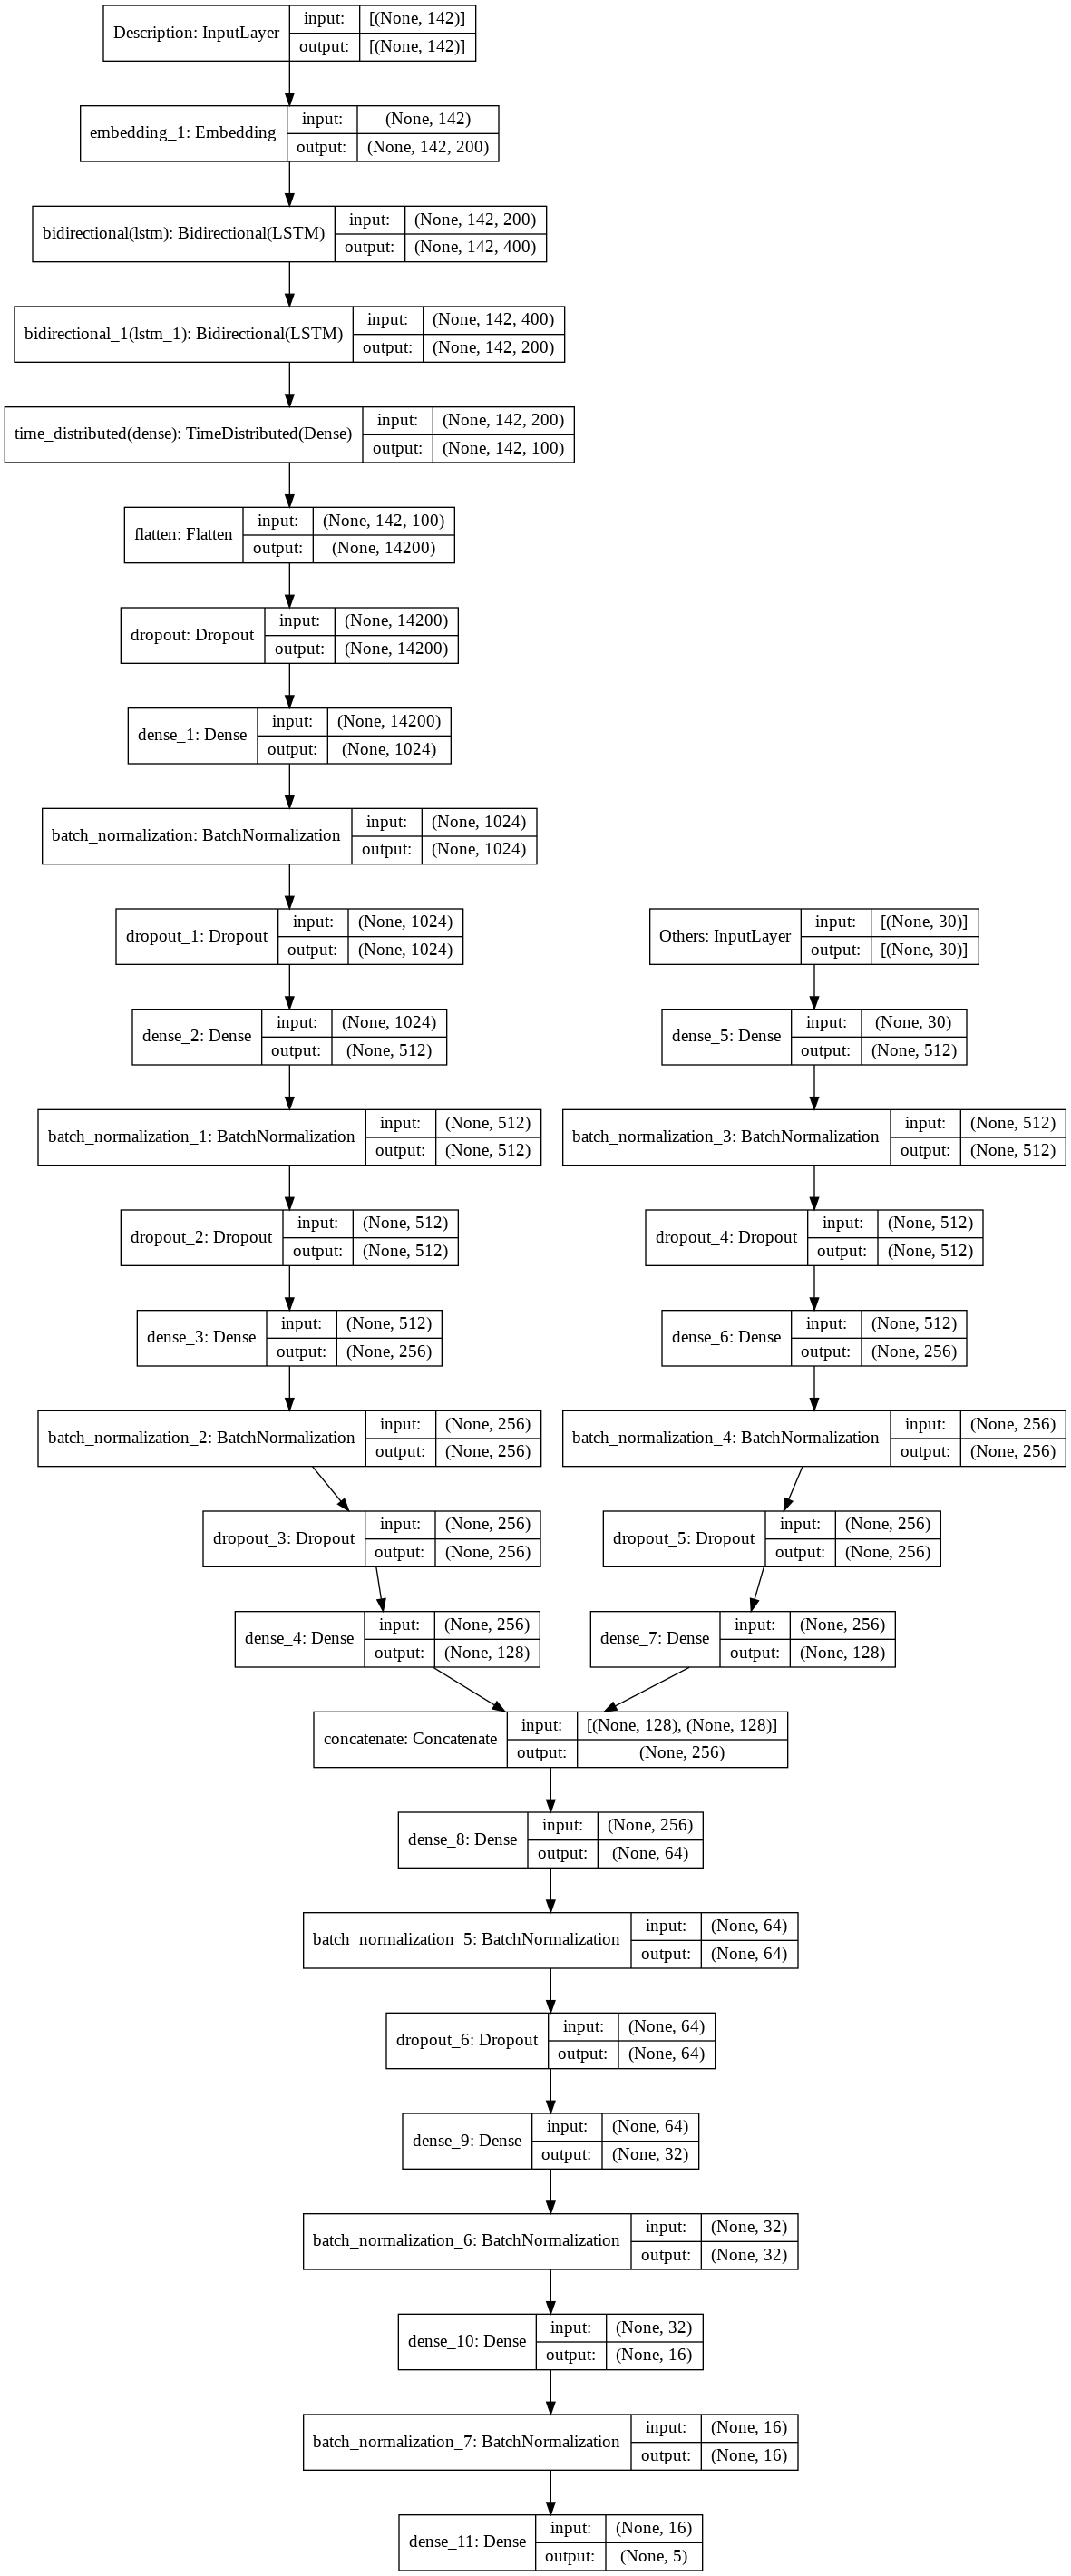

In [ ]:
keras.utils.plot_model(Final_Model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.001) 
Final_Model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)
stop = EarlyStopping(monitor="val_loss", patience=5)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-20, verbose=1)
callbacks=[checkpoint,reduce_lr]

In [ ]:
# weights={0:1,1:8,2:10,3:11,4:40}

In [ ]:
# from keras.models import load_model
# load_model('/content/model-0.81.h5')

In [ ]:
history_non_smote=Final_Model.fit({'Description':x_train_description,'Others':x_train_others},y_train,
                validation_data=({'Description':x_test_description,'Others':x_test_others},y_test),
                batch_size=32,callbacks=callbacks,epochs=50)#,class_weight=weights)

Epoch 1/50
10/10 [==============================] - 34s 2s/step - loss: 2.1349 - accuracy: 0.2071 - val_loss: 1.4576 - val_accuracy: 0.6168

Epoch 00001: val_loss improved from inf to 1.45762, saving model to model-1.46.h5
Epoch 2/50
10/10 [==============================] - 22s 2s/step - loss: 1.9075 - accuracy: 0.2712 - val_loss: 1.3920 - val_accuracy: 0.7477

Epoch 00002: val_loss improved from 1.45762 to 1.39197, saving model to model-1.39.h5
Epoch 3/50
10/10 [==============================] - 21s 2s/step - loss: 1.6903 - accuracy: 0.3067 - val_loss: 1.3877 - val_accuracy: 0.6262

Epoch 00003: val_loss improved from 1.39197 to 1.38772, saving model to model-1.39.h5
Epoch 4/50
10/10 [==============================] - 21s 2s/step - loss: 1.6436 - accuracy: 0.3597 - val_loss: 1.5560 - val_accuracy: 0.1776

Epoch 00004: val_loss did not improve from 1.38772
Epoch 5/50
10/10 [==============================] - 22s 2s/step - loss: 1.5035 - accuracy: 0.4320 - val_loss: 1.6992 - val_accuracy

In [ ]:
# history_smote=Final_Model.fit({'Description':x_res_description,'Others':x_res_others},y_res,
#                 validation_data=({'Description':x_test_description,'Others':x_test_others},y_test),
#                 batch_size=32,epochs=50,callbacks=callbacks,class_weight=weights)

In [ ]:
history_non_smote

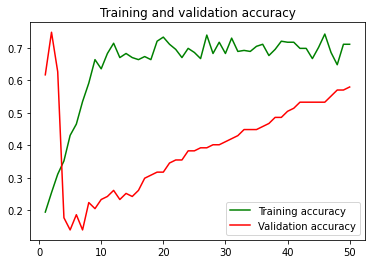

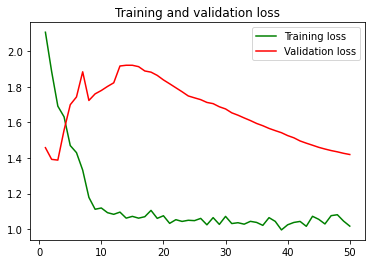

In [ ]:
acc = history_non_smote.history['accuracy']
val_acc = history_non_smote.history['val_accuracy']
loss = history_non_smote.history['loss']
val_loss = history_non_smote.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

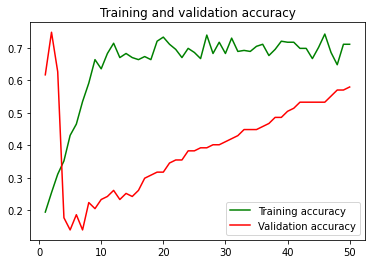

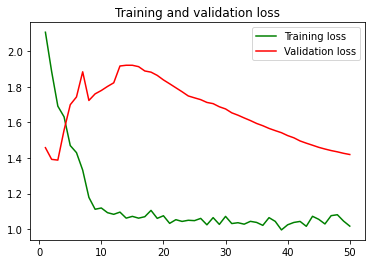

In [ ]:
acc = history_non_smote.history['accuracy']
val_acc = history_non_smote.history['val_accuracy']
loss = history_non_smote.history['loss']
val_loss = history_non_smote.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_pred=Final_Model.predict({'Description':x_test_description,'Others':x_test_others})

In [ ]:
y_pred_labels=[]
for i in range(0,len(y_pred)):
  y_pred_labels.append(list(y_pred[i]).index(max(y_pred[i])))

In [ ]:
 from sklearn.metrics import confusion_matrix
 from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
multilabel_confusion_matrix(y_test, y_pred_labels,labels=list(set(accident_level_encoded)))

array([[[ 18,   7],
        [ 28,  54]],

       [[ 78,  18],
        [  7,   4]],

       [[ 97,   8],
        [  2,   0]],

       [[ 88,   9],
        [  6,   4]],

       [[102,   3],
        [  2,   0]]])

In [ ]:
# Final_Model.fit({'Description':x_train_description,'Others':x_train_others},y_train,
#                 validation_data=({'Description':x_test_description,'Others':x_test_others},y_test),batch_size=32,epochs=50,callbacks=callbacks)

### Additional Code

In [ ]:
# Code to understand Embedding Layer...............

# padded_tokenized_description[1].shape
# model.predict(padded_tokenized_description[1].reshape(-1,142))
# padded_tokenized_description[1]
# sentence=''
# for i in padded_tokenized_description[1]:
#   sentence+=number_word_mapping[i]+' '
# sentence

In [ ]:
# model_2=Sequential()
# model_2.add(input_layer_others)
# dense_layers_1_others = Dense(units=512, activation = 'relu')         
# model_2.add(dense_layers_1_others)              
# model_2.add(Dense(units=256, activation = 'relu'))
# model_2_out=Dense(units=128, activation = 'relu')
# model_2.add(model_2_out)

In [ ]:
# model_1=Model(inputs=[input_layer_description],outputs=[model_1_out])

In [ ]:
# # Inputs to the Model............
# input_layer_description=Input(shape=(MAX_LEN))
# input_layer_others=Input(shape=(x_train_others.shape[1]))

# # Embedding Layer Description

# embedding_layer_description=Embedding(num_words,output_dim=EMBEDDING_SIZE, weights=[embedding_matrix], input_length=MAX_LEN,trainable=False)(input_layer_description)
# model_1.add(embedding_layer_description)


# lstm_layer_1_description=Bidirectional(LSTM(units=200, return_sequences=True, recurrent_dropout=0.5,kernel_initializer='he_normal'))
# model_1.add(lstm_layer_1_description)
# lstm_layer_2_description=Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.5,kernel_initializer='he_normal'))
# model_1.add(lstm_layer_2_description)
# time_distributed_layer_description=TimeDistributed(Dense(100, activation="tanh"))
# model_1.add(time_distributed_layer_description)
# flatten_layer_description=Flatten()
# model_1.add(flatten_layer_description)
# dropout_layer_1_description=Dropout(0.3)
# model_1.add(dropout_layer_1_description)
# dense_layer_1_description=Dense(units=1024,activation='relu',use_bias=True)
# model_1.add(dense_layer_1_description)
# batch_normalization_description=BatchNormalization()
# model_1.add(batch_normalization_description)
# model_1.add(Dense(units=512, activation = 'relu'))
# model_1.add(BatchNormalization())
# model_1.add(Dense(units=256, activation = 'relu'))
# model_1.add(BatchNormalization())
# model_1_out=Dense(units=128, activation = 'relu')
# model_1.add(model_1_out)

In [ ]:
# from tensorflow.keras.layers import Concatenate
# concatenate_layer=Concatenate([model_1_out,model_2_out])

In [ ]:
# merged_model=Model([model_1])
# model_2.add(Dense(units=64, activation = 'relu'))
# model.add(BatchNormalization())

# model_2.add(Dense(units=32, activation = 'relu'))
# model_2.add(BatchNormalization())

# model_2.add(Dense(units=16, activation = 'relu'))
# model_2.add(BatchNormalization())

# model_2.add(Dense(units=5, activation = 'softmax'))
# model_2.add(BatchNormalization())

In [ ]:

# model.add(Dense(units=128, activation = 'relu'))
# model.add(BatchNormalization())

# model.add(Dense(units=64, activation = 'relu'))
# model.add(BatchNormalization())

# model.add(Dense(units=32, activation = 'relu'))
# model.add(BatchNormalization())

# model.add(Dense(units=16, activation = 'relu'))
# model.add(BatchNormalization())

# model.add(Dense(units=10, activation = 'softmax'))
# model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

In [ ]:
# model=Sequential()
# # input_layer = Input(shape=(max_len,embedding_size)) # Input layer
# # model.add(input_layer)
# embedding_layer=Embedding(num_words,output_dim=EMBEDDING_SIZE, weights=[embedding_matrix], input_length=MAX_LEN,trainable=False)
# model.add(embedding_layer)
# # lstm_layer=Bidirectional(LSTM(units=200, return_sequences=True, recurrent_dropout=0.5,kernel_initializer='he_normal'))
# # model.add(lstm_layer)
# # lstm_layer=Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.5,kernel_initializer='he_normal'))
# # model.add(lstm_layer)
# # model.add(TimeDistributed(Dense(100, activation="tanh")))
# # model.add(Flatten())
# # model.add(Dropout(0.3))
# # model.add(Dense(units=1024,activation='relu',use_bias=True))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.3))
# # model.add(Dense(units=256,activation='relu',use_bias=True))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.3))
# # model.add(Dense(units=64,activation='relu',use_bias=True))
# # model.add(BatchNormalization())
# # model.add(Dropout(0.3))
# # output_layer=Dense(units=1,activation='sigmoid',use_bias=True)
# # model.add(output_layer)